<a href="https://colab.research.google.com/github/GioAcosta1/Traduccion-de-textos/blob/main/SA_PU5_SEQ2SEQ_CON_ATENCION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensioai/blog/blob/master/041_attention/attention.ipynb)

# **Práctica #5: Traducción automática de texto**

*Centro Universitario de Ciencias Exactas e Ingenierías*

*División de Tecnologías para la Integración Ciber-Humana*

*Ingeniería Biomédica*


*Mtra. Sofía Alejandra Aguilar Valdez*

01 de diciembre de 2022

# Información del equipo

**``NOMBRES:``**

Acosta Martínez Edgar Giovanni


**``CÓDIGOS:``** 
216590878

**```LINK REPOSITORIO:```**


## **Contenido**
1.   Resumen
2.   Marco teórico
3.   Objetivos
4.   Materiales y métodos
5.   Resultados
6.   Discusión
7.   Conclusiones
8.   Referencias

# **1. Resumen**


#**2. Marco teórico**
**2.1 ¿Qué es la Traducción automática neuronal(NMT)?**

Traducir un texto es una tarea donde se realiza un modelo de probabilidad condicional **P(y|x)**, donde lo que se intenta es que para una frase *x* en un idioma particular, encontrar una frase *y* en otro idioma. De manera formal, el objetivo de esto es encontrar una frase de salida que maximice esta probabilidad condicional (la mejor frase). Utilizando la regla de Bayes, tal como lo exponen en [1], se obtiene la siguiente ecuación 

$$argmax_yP(y|x) -> argmax_yP(x|y)P(y)$$

Donde P(x|y) indica como se traducen las palabras o frases (el modelo de traducción) y P(y) es el modelo de la lengua o idioma objetivo.
Esto puede parecer una problema sencillo de modelar. No obstante, un idioma como tal es un sistema bastante complejo debido al diferente significado de una misma palabra en diferentes contextos. Esto complica las cosas. Un ejemplo, expuesto por [1] se visualiza en la siguiente imagen:

![](https://miro.medium.com/max/503/1*L6kQV-5kdnz-HC_myrVjJw.png)

En turco, *Yarın çalışacağım*, se traduce como *I will study tomorrow* en inglés o "Yo estudiaré mañana" en español. La cantidad de palabras es distinta, pero conlleva el mismo significado en todas las lenguas. Es así, que la tarea de traducir un texto conlleva la capacidad de razonar la relación semántica de las palabras, y sus distintos significados, dependiendo del contexto.

Existen modelos de redes neuronales que intentan establecer estas relaciones entre palabras, y uno de ellos es el famoso modelo **Secuencia a Secuencia**, también conocido como **seq2seq**

**2.2 Modelo Secuencia a Secuencia (seq2seq)**

Las redes neuronales Secuencia a Secuencia (*seq2seq*) consisten en dos redes neuronales recurrentes (RNN) que, en conjunto, transforman una secuencia de entrada en otra de salida. Tal como lo expone [2], este tipo de esquema de redes cuenta con dos etapas: una etapa codificadora (*encoder*), donde una red condensa una secuencia en un vector, y una etapa decodificadora, donde el vector condensado se despliega en una nueva secuencia.

Sutskever et al. [3] propuso esta arquitectura para procesamiento del lenguaje natural (NLP, por sus siglas en inglés). En esta arquitectura, se propone las dos RNN, una codificadora, y una decodificadora. En la siguiente imagen se observa esta arquitectura, donde se traduce la secuencia de entrada *A B C* a la secuencia de salida *W X Y Z* [3]. Nótese que en la secuencia existen unos indicadores llamados "EOS" que vienen de *End of Sentence*, que le indican a la red cuando comenzar a traducir y cuando parar.

![](https://miro.medium.com/max/700/1*xPOMN3dZII02EFwIyQXpIA.png)

**2.3 Mecanismo de atención**

El modelo *seq2seq* funciona bien cuando se trata de secuencias cortas, ya que la entrada del decoder es el último estado oculto de la etapa del encoder. Con esto, mantener la relación del significado entre la frase origen y la frase objetivo se logra mantener mejor para las últimas palabras a comparación de las primeras. Esto nos indica que, a secuencias más grandes, nuestro modelo comienza a "olvidar" y deja de prestar atención a las primeras frases, pensando que no tienen mucha influencia en el significado global.

Para solucionar esto, en 2017 sale a la luz un artículo que revolucionó la forma en que se trabaja en problemas de NLP, entre muchos más. *Attention Is All You Need* [4] nos plantea un **mecanismo de atención** capaz de mantener las relaciones entre las palabras de una frase, por medio de una ponderación matemática entre ellas. Y lo más interesante, es que estás mismas ponderaciones son calculadas por otra red neuronal.

Es así, que esta capa de atención le da más o menor importancia a las palabras de una oración, dependiendo de cual palabra esta enfocando, por medio de una multiplicació matricial de sus ponderaciones calculadas previamente.

Analizando el ejemplo de la traducción del idioma turco al inglés, el modelo ha logrado encontrar las primeras palabras *I Will Study* pero aún necesita encontrar la relación existente entre *Yarin* y la palabra que le hace falta. Para esto, utiliza el último estado oculto del decodificador, además de los estados ocultos de las dos secuencias de entrada, junto con su ponderación de atención y calcula el producto punto entre ellas. Esto nos dice, tomando las secuencias como vectores, que tan cercanos se encuentran (la relación entre ambos vectores).

Lo que se obtiene es una puntuación, que debe ser normalizada como una distribución de probabilidad final para las palabras de entrada. En este caso, *Yarin* obtendría la puntuación más alta con respecto a *çalışacağım*. Por lo tanto, en lugar de utilizar el último estado oculto del decodificador, se utiliza la suma ponderada de los vectores de entrad para así predecir la siguiente palabra [1].

En la siguiente imagen, se ilustra el ejemplo explicado anteriormente.

![](https://miro.medium.com/max/700/1*1-dj7NIbfu7mi8eHzc5csA.png)

#**3. Objetivos**

**Objetivo general:**

Realizar un modelo de Traducción Automática Neuronal (NMT) capaz de traducir oraciones del idioma alemán al idioma Inglés, y viceversa, utilizando un modelo Secuencia a Secuencia (*seq2seq*) con mecanismo de atención.

**Objetivos específicos:**

*   Obtener una base de datos que contenga frases en idioma alemán con su traducción al idioma inglés
*   Realizar el preprocesamiento de la base de datos obtenida para eliminar caractéres no deseados que compliquen la traducción de las oraciones
+   Realizar un modelo *seq2seq* con mecanismo de atención



#**4. Materiales y métodos**

**4.1 Materiales**

La base de datos utilizada para el entrenamiento del modelo neuronal presentado en este trabajo se obtuvo de [[5]](https://www.manythings.org/anki/). Consta de un archivo en formato .txt de frases en inglés con su traducción al alemán.

Las frases se encuentran separadas por un tabulador (*\t*) indicando su traducción y cada nueva traducción está separada por un salto de línea (*\n*).

En total, el archivo cuenta con 255817 pares de frases, de las cuales 196685 tienen una longitud menor de 10 palabras. El vocabulario en español cuenta con 13904 palabras y el vocabulario alemán cuenta con 28105 palabras.

**4.2 Métodos**

Para realizar la tarea de traducción de frases en alemán al idioma inglés, y viceversa, se utilizó el código desarrollado por [1], el cual traduce frases del idioma francés al idioma inglés.

A continuación, se muestra el código de programación interactivo implementado en *Google Colab*, con cada una de sus secciones implicadas en la resolución del problema de traducción automática.

## Carga de datos y separación en pares de traducción (Pre-procesamiento de los datos)

Se vincula drive para cargar la base de datos previamente descargada

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se definen funciones para leer el archivo y dividirlo en pares de frases de traducción

In [2]:
import unicodedata
import re

#Función para pasar de formato unicode a formato Ascii
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

#Función para convertir todas las frases en minusculas, sin espacio, y eliminando todos los caractéres extraños
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s
#Lectura del archivo, separación en lineas y su divisón en pares de traducción normalizados
def read_file(file, reverse=False):
    lines = open(file, encoding='utf-8').read().strip().split('\n')
    pairs = [[normalizeString(s) for s in l.split('\t')[:2]] for l in lines]
    return pairs

Se lee el archivo y se almacenan los pares de frases en una lista

In [3]:
filepath = '/content/drive/MyDrive/DEEP LEARNING/TRANSLATION PROYECT/deu.txt'
pairs = read_file(filepath)

Se visualizan los pares de frases de manera aleatoria

In [4]:
import random

random.choice(pairs)

['tom must choose between honor and death .',
 'tom muss die ehre wahlen oder aber den tod .']

Se necesita definir un *tokenizador*. La clase Lang se encarga de asignar un índice único a cada palabra, calculando también su frecuencia, para quedarnos con las palabras más frecuentes. Además, se definen dos tokens especiales: "EOS" y "SOS", que van a indicar el final, y el inicio de las oraciones, respectivamente. Aunado a esto, también se define el token "PAD" que va servir para ajustar todas las secuencias al tamaño máximo de longitud definido.

In [5]:
SOS_token = 0
EOS_token = 1
PAD_token = 2

class Lang:
    #Se inicializa la clase
    def __init__(self, name)
        self.name = name
        self.word2index = {"SOS": 0, "EOS": 1, "PAD": 2}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS", 2: "PAD"}
        self.n_words = 3  # Count SOS, EOS and PAD

    #Función para añadir oraciones
    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)
    #Función para tokenizar palabras
    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1
    #Función para pasar de oraciones a indices
    def indexesFromSentence(self, sentence):
        return [self.word2index[word] for word in sentence.split(' ')]
    
    #Función para pasar de índices a oraciones
    def sentenceFromIndex(self, index):
        return [self.index2word[ix] for ix in index]

Debido a las características de la capa de atención que se va a implementar, las frases deben tener una longitud homogénea (por las operaciones matriciales que se realizan). Es así como se define un tamaño máximo de 10. Además, también se definen ciertos prefijos del inglés junto con sus contracciones. Esto se utiliza para realizar filtrados en las oraciones.

In [6]:
#Se define el tamaño máximo de longitud de las secuencias
MAX_LENGTH = 10

#Se definen los prefijos y sus contracciones (filtro)
eng_prefixes = (
    "i am ", "i m ",
    "he is", "he s ",
    "she is", "she s ",
    "you are", "you re ",
    "we are", "we re ",
    "they are", "they re "
)

#Filtro para los prefijos
def filterPairs(pairs, filters, lang=0):
    return [p for p in pairs if p[lang].startswith(filters)]

#Filtra por tamaño de longitud
def trimPairs(pairs):
    return [p for p in pairs if len(p[0].split(' ')) < MAX_LENGTH and len(p[1].split(' ')) < MAX_LENGTH]

Se integra la clase Lang y los filtros en una función que también permite cambiar el sentido de traducción. Además, se agrega el token "EOS" a las oraciones

In [7]:
def prepareData(file, filters=None, reverse=False):
    #Se lee el archivo
    pairs = read_file(file, reverse)
    print(f"Tenemos {len(pairs)} pares de frases")
    
    #Si se desea, se filtra por prefijos
    if filters is not None:
        pairs = filterPairs(pairs, filters, int(reverse))
        print(f"Filtramos a {len(pairs)} pares de frases")

    #Se filtra por tamaño de longitud
    pairs = trimPairs(pairs)
    print(f"Tenemos {len(pairs)} pares de frases con longitud menor de {MAX_LENGTH}")

    # Se decide la dirección de traducción
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang('eng')
        output_lang = Lang('deu')
    else:
        input_lang = Lang('deu')
        output_lang = Lang('eng')
    
    #Se añaden las oraciones para tokenizarlas
    for pair in pairs:
        input_lang.addSentence(pair[0])
        output_lang.addSentence(pair[1])
        
        # Se añade el token "EOS"
        pair[0] += " EOS"
        pair[1] += " EOS"
                           
    print("Longitud vocabularios:")
    print(input_lang.name, input_lang.n_words)
    print(output_lang.name, output_lang.n_words)
                           
    return input_lang, output_lang, pairs

#Se instancia la función con el dataset
input_lang, output_lang, pairs = prepareData(filepath)

#Si se desea filtrar por prefijos, se descomenta esta parte
#input_lang, output_lang, pairs = prepareData('spa.txt', filters=eng_prefixes)
                           
random.choice(pairs)

Tenemos 255817 pares de frases
Tenemos 196685 pares de frases con longitud menor de 10
Longitud vocabularios:
spa 13904
eng 28105


['i m unhappy . EOS', 'ich bin unglucklich . EOS']

In [8]:
#Se visualizan los índices dada una oración
input_lang.indexesFromSentence('forgive us ')

[477, 90, 400]

In [9]:
#Se visualiza la oración dados unos índices
output_lang.sentenceFromIndex([3, 1028, 647, 5])

['geh', 'deins', 'nuchtern', 'hallo']

Tal como se mencionó con anterioridad, todas las oraciones deben tener la misma longitud para poder utilizar el mecanismo de atención. Por lo tanto, se añade un *padding* para rellenar aquellas oraciones menores que la máxima longitud establecida.

In [10]:
import torch
#Se utiliza la gpu en caso de ser posible
device = "cuda" if torch.cuda.is_available() else "cpu"

#Clase que agrega el padding a las oraciones para tener secuencias homogéneas
class Dataset(torch.utils.data.Dataset):
    def __init__(self, input_lang, output_lang, pairs, max_length):
        self.input_lang = input_lang
        self.output_lang = output_lang
        self.pairs = pairs
        self.max_length = max_length
    
    #Regrega la cantidad de secuencias
    def __len__(self):
        return len(self.pairs)
        
    def __getitem__(self, ix):        
        inputs = torch.tensor(self.input_lang.indexesFromSentence(self.pairs[ix][0]), device=device, dtype=torch.long)
        outputs = torch.tensor(self.output_lang.indexesFromSentence(self.pairs[ix][1]), device=device, dtype=torch.long)
        #Se agrega el padding
        return torch.nn.functional.pad(inputs, (0, self.max_length - len(inputs)), 'constant', self.input_lang.word2index['PAD']), \
            torch.nn.functional.pad(outputs, (0, self.max_length - len(outputs)), 'constant', self.output_lang.word2index['PAD'])

#Se realiza la separación de las secuencias en train (80%) y test (20%)
train_size = len(pairs) * 80 // 100 
train = pairs[:train_size]
test = pairs[train_size:]

#Se define el diccionario de dataset con las secuencias de train y test
dataset = {
    'train': Dataset(input_lang, output_lang, train, max_length=MAX_LENGTH),
    'test': Dataset(input_lang, output_lang, test, max_length=MAX_LENGTH)
}

#Se visualiza el tamaño del dataset de entrenamiento y de test
len(dataset['train']), len(dataset['test'])

(157348, 39337)

In [11]:
#Se visualiza cómo se encuentran los datos dentro del diccionario dataset
input_sentence, output_sentence = dataset['train'][1]

input_sentence, output_sentence

(tensor([5, 4, 1, 2, 2, 2, 2, 2, 2, 2], device='cuda:0'),
 tensor([5, 6, 1, 2, 2, 2, 2, 2, 2, 2], device='cuda:0'))

In [12]:
#Se visualizan las oraciones a partir de los indices
input_lang.sentenceFromIndex(input_sentence.tolist()), output_lang.sentenceFromIndex(output_sentence.tolist())

(['hi', '.', 'EOS', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD'],
 ['hallo', '!', 'EOS', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD'])

Se define un *dataloader* para las secuencias de entrenamiento, con un tamaño de batch de 64, de manera aleatoria; y un *dataloader* de validación, con un tamaño de batch de 256.

In [13]:

dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True),
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=256, shuffle=False),
}

#Se visualiza el tamaño del dataloader de entrenamiento con cada iteración
inputs, outputs = next(iter(dataloader['train']))
inputs.shape, outputs.shape

(torch.Size([64, 10]), torch.Size([64, 10]))

## Estructura del modelo seq2seq

**Encoder**

Para la etapa de *encoder*, se utiliza una red neuronal recurrente (RNN). Se tiene una primera capa de tipo *embedding* que obtendrá la representación vectorial de las secuencias de entrada. Estos vectores resultantes, serán la entrada de la RNN. Está puede ser una LSTM o una GRU (Gated-Recurrent Units).
En este caso particular, se utilizara una GRU.

In [26]:
class Encoder(torch.nn.Module):
    def __init__(self, input_size, embedding_size=100, hidden_size=100, n_layers=2):
        super().__init__()
        self.hidden_size = hidden_size
        self.embedding = torch.nn.Embedding(input_size, embedding_size)
        self.gru = torch.nn.GRU(embedding_size, hidden_size, num_layers=n_layers, batch_first=True)

    def forward(self, input_sentences):
        embedded = self.embedding(input_sentences)
        outputs, hidden = self.gru(embedded)
        return outputs, hidden

In [27]:
#Se visualiza la forma que tendrá la salida del encoder
encoder = Encoder(input_size=input_lang.n_words)
encoder_outputs, encoder_hidden = encoder(torch.randint(0, input_lang.n_words, (64, 10)))

# [tamaño de batch, tamaño de secuencia, tamaño del estado oculto]
encoder_outputs.shape

torch.Size([64, 10, 100])

In [28]:
#Se visualiza la forma que tendrá el estado oculto de cada palabra
# [número de capas, tamaño de batch, Tamaño del estado oculto]
encoder_hidden.shape

torch.Size([2, 64, 100])

**Decoder con mecanismo de atención**

Para la etapa de *decoder*, se utilizarán las entradas y estado oculto del *decoder* para encontrar pesos que ponderen las salidas del *encoder*, los cuales se combinan con las entradas del *decoder, para así obtener las representaciones vectoriales de entrada para la capa recurrente de esta etapa.

In [29]:
class AttnDecoder(torch.nn.Module):
    def __init__(self, input_size, embedding_size=100, hidden_size=100, n_layers=2, max_length=MAX_LENGTH):
        super().__init__()

        self.embedding = torch.nn.Embedding(input_size, embedding_size)
        self.gru = torch.nn.GRU(embedding_size, hidden_size, num_layers=n_layers, batch_first=True)
        self.out = torch.nn.Linear(hidden_size, input_size)
        
        # Capa de mecanismo de atención
        self.attn = torch.nn.Linear(hidden_size + embedding_size, max_length)
        self.attn_combine = torch.nn.Linear(hidden_size * 2, hidden_size)


    def forward(self, input_words, hidden, encoder_outputs):
        #Se obtienen los vectores embedding
        embedded = self.embedding(input_words)
        #Se obtiene el vector de ponderación de la capa de atención
        attn_weights = torch.nn.functional.softmax(self.attn(torch.cat((embedded.squeeze(1), hidden[0]), dim=1))) 
        #Se ajustan las salidas del encoder con este vector de ponderación
        attn_applied = torch.bmm(attn_weights.unsqueeze(1), encoder_outputs)
        output = torch.cat((embedded.squeeze(1), attn_applied.squeeze(1)), 1)
        #Se aplica la capa de atención
        output = self.attn_combine(output)
        output = torch.nn.functional.relu(output)
        #Se aplica la capa recurrente, con las salidas ajustas del encoder y el estado oculto
        output, hidden = self.gru(output.unsqueeze(1), hidden)
        #Se obtiene la secuencia de salida
        output = self.out(output.squeeze(1))        
        return output, hidden, attn_weights

In [30]:
#Se visualiza la forma del vector de salida del decoder
decoder = AttnDecoder(input_size=output_lang.n_words)
decoder_output, decoder_hidden, attn_weights = decoder(torch.randint(0, output_lang.n_words, (64, 1)), encoder_hidden, encoder_outputs)

# [Tamaño de batch, Tamaño de vocabulario]
decoder_output.shape

<ipython-input-29-bc211ece5c6b>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attn_weights = torch.nn.functional.softmax(self.attn(torch.cat((embedded.squeeze(1), hidden[0]), dim=1)))


torch.Size([64, 28105])

In [31]:
#Se visualiza el tamaño del estado oculto del decoder
# [Número de capas, Tamaño de batch, Tamaño del estado oculto]
decoder_hidden.shape

torch.Size([2, 64, 100])

In [33]:
#Se visualiza el tamaño del vector de ponderación para el mecanismo de atención
# [Tamaño de batch, Longitud]
attn_weights.shape

torch.Size([64, 10])

## Entrenamiento del modelo

Para el entrenamiento del modelo, debido a que se tienen dos redes neuronales recurrentes (*encoder* y *decoder*), se requieren dos optimizadores. El encoder recibe la frase en el idioma original y se obtiene el estado oculto. Este estado oculto será la entrada del *decoder*, que identificará el token *SOS*, para así generar la primera palabra de la frase. Así, en la siguiente iteración, se utilizara como entrada la anterior salida del decoder, para llegar al token *EOS* y terminar la traducción.

In [34]:
from tqdm import tqdm
import numpy as np

#La función fit recibe la red encoder, la red decoder, el dataloader y la cantidad de épocas
def fit(encoder, decoder, dataloader, epochs=10):
    encoder.to(device)
    decoder.to(device)
    #Se definen ambos optimizadores con Adam y su respectivo learning rate de 0.001
    encoder_optimizer = torch.optim.Adam(encoder.parameters(), lr=1e-3)
    decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=1e-3)
    #Se define la función de perdida
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        encoder.train()
        decoder.train()
        train_loss = []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            #Se adquieren las oraciones de entrada y la traducción
            input_sentences, output_sentences = batch
            bs = input_sentences.shape[0]                    
            loss = 0
            #Se ajustan los gradientes a cero
            encoder_optimizer.zero_grad()
            decoder_optimizer.zero_grad()
            # Se obtieen el último estado oculto del encoder y sus salidas
            encoder_outputs, hidden = encoder(input_sentences)
            #Se inicializa el decoder con el token "SOS" y se itera para obtener sus salidas
            #La entrada del decoder pasa a ser su salida y estado oculto anterior
            decoder_input = torch.tensor([[output_lang.word2index['SOS']] for b in range(bs)], device=device)
            for i in range(output_sentences.shape[1]):
                output, hidden, attn_weights = decoder(decoder_input, hidden, encoder_outputs)
                #Se va almacenando la función de perdida
                loss += criterion(output, output_sentences[:, i].view(bs))     
                #La salida del decoder sirve como su entrada para la siguiente predicción
                decoder_input = torch.argmax(output, axis=1).view(bs, 1)
            #Optimización del modelo
            loss.backward()
            encoder_optimizer.step()
            decoder_optimizer.step()
            train_loss.append(loss.item())
            #Se imprime la función de perdida durante cada época
            bar.set_description(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f}")

        #Validación del modelo    
        val_loss = []
        encoder.eval()
        decoder.eval()
        with torch.no_grad():
            bar = tqdm(dataloader['test'])
            for batch in bar:
                input_sentences, output_sentences = batch
                bs = input_sentences.shape[0]  
                loss = 0
                # obtenemos el último estado oculto del encoder
                encoder_outputs, hidden = encoder(input_sentences)
                # calculamos las salidas del decoder de manera recurrente
                decoder_input = torch.tensor([[output_lang.word2index['SOS']] for b in range(bs)], device=device)
                for i in range(output_sentences.shape[1]):
                    output, hidden, attn_weights = decoder(decoder_input, hidden, encoder_outputs)
                    loss += criterion(output, output_sentences[:, i].view(bs))     
                    # el siguiente input será la palabra predicha
                    decoder_input = torch.argmax(output, axis=1).view(bs, 1)
                val_loss.append(loss.item())
                #Se imprime la validación de la función de perdida durante cada época de entrenamiento
                bar.set_description(f"Epoch {epoch}/{epochs} val_loss {np.mean(val_loss):.5f}")
    return train_loss, val_loss

##Predicciones del modelo

Para poder visualizar las traducciones del modelo entrenado, se define una función *predict* que realiza un proceso iterativo parecido al entrenamiento con el *decoder*.

Se inicia el decoder con el token "SOS" y el último estado oculto del encoder. A partir de esto, comienza a realizar predicciones, y cada una de estas secuencias de salida, se convierten en su entrada junto con el estado oculto resultante, hasta que predice el token "EOS" y se termina la traducción.

In [50]:
def predict(input_sentence):
    # obtenemos el último estado oculto del encoder
    encoder_outputs, hidden = encoder(input_sentence.unsqueeze(0))
    # calculamos las salidas del decoder de manera recurrente
    decoder_input = torch.tensor([[output_lang.word2index['SOS']]], device=device)
    # iteramos hasta que el decoder nos de el token <eos>
    outputs = []
    decoder_attentions = torch.zeros(MAX_LENGTH, MAX_LENGTH)
    i = 0
    while True:
        output, hidden, attn_weights = decoder(decoder_input, hidden, encoder_outputs)
        decoder_attentions[i] = attn_weights.data
        i += 1
        decoder_input = torch.argmax(output, axis=1).view(1, 1)
        outputs.append(decoder_input.cpu().item())
        if decoder_input.item() == output_lang.word2index['EOS']:
            break
    return output_lang.sentenceFromIndex(outputs), decoder_attentions

#**5. Resultados**

Al entrenar el modelo durante 30 épocas, se obtiene el siguiente proceso de entrenamiento:

In [35]:
[train_loss, val_loss] = fit(encoder, decoder, dataloader, epochs=30)

  0%|          | 0/2459 [00:00<?, ?it/s]<ipython-input-29-bc211ece5c6b>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attn_weights = torch.nn.functional.softmax(self.attn(torch.cat((embedded.squeeze(1), hidden[0]), dim=1)))
Epoch 30/30 val_loss 39.86345: 100%|██████████| 154/154 [00:08<00:00, 18.88it/s]


Al **inicio del entrenamiento**, la función de perdida es de 31.28985 y su validación es de 41.73479. Al **finalizar el entrenamiento**, la función de perdida es de 8.40686 y su validación es de 39.86345.

## Visualización de traducción

Para poder ver en funcionamiento el modelo, se obtiene una oración del dataset junto con su predicción. Esta última sirve para evaluar la calidad de predicción del modelo. Así, la oración obtenida se introduce en la función de predicción y obtenemos la secuencia de salida.

In [52]:
#Obtenemos una secuencia del dataset y su traducción, para saber cuál es el resultado más acertado
input_sentence, output_sentence = dataset['train'][60]
input_lang.sentenceFromIndex(input_sentence.tolist()), output_lang.sentenceFromIndex(output_sentence.tolist())

(['he', 'ran', '.', 'EOS', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD'],
 ['er', 'rannte', '.', 'EOS', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD', 'PAD'])

In [53]:
#Se realiza la predicción y se muestra la oración obtenida.
output_words, attn = predict(input_sentence)
output_words

<ipython-input-29-bc211ece5c6b>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attn_weights = torch.nn.functional.softmax(self.attn(torch.cat((embedded.squeeze(1), hidden[0]), dim=1)))


['er', 'rannte', '.', 'EOS']

En este caso particular, donde la secuencia de entrada es *he ran. EOS*, y traducción es *er rannte. EOS*, el modelo entrenado obtuvo la secuencia *er rannte. EOS*.

## Visualización de atención

Una vez generada la secuencia, podemos analizar los mecanismos de atención implicados en la obtención de esta misma a partir de una matriz de visualización de atención, donde cada palabra guarda una relación con otra.

In [54]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def showAttention(input_sentence, output_words, attentions):
    lim1, lim2 = input_sentence.index('EOS')+1, output_words.index('EOS')+1
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions[:lim2, :lim1].numpy(), cmap='bone')
    fig.colorbar(cax)
    # Set up axes
    ax.set_xticklabels([' '] + input_sentence[:lim1], rotation=90)
    ax.set_yticklabels([' '] + output_words)
    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.show()

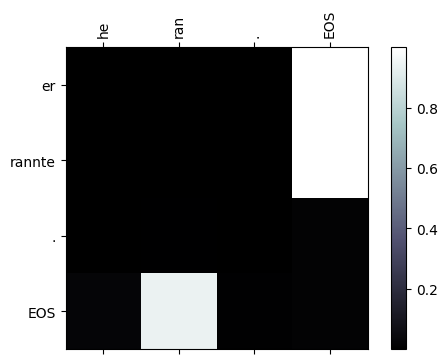

In [55]:
showAttention(input_lang.sentenceFromIndex(input_sentence.tolist()), output_words, attn)

#**6. Discusión**

El entrenamiento del modelo *seq2seq* con un mecanismo de atención integrado, sufrió de overfitting. Esto se visualiza gracias a que la función de perdida en la validación comenzó a aumentar conforme aumentaban las épocas.
Por lo tanto, el modelo generado logra traducir bien solo aquellas oraciones con las que realizó el entrenamiento. Es así, que, si se introduce una nueva oración, el modelo tendrá bastantes problemas para generar una traducción óptima.

El overfitting también se puede visualizar en la matriz de visualización de atención, donde se nota que la palabra *ran*, *rannte* y *er* tiene una relación mayor con el token especial *EOS*. Esto indica que en el modelo solo basta tener la palabra e identificar ese token, para ya saber la traducción.

En posteriores trabajos, se debe realizar un entrenamiento con mayor cantidad de secuencias, variando el tamaño máximo de la longitud y variando los hiperparámetros del modelo. Además, sería necesario generar una comparación detallada del entrenamiento de un modelo *seq2seq*, un modelo *seq2seq* con mecanismo de atención, y un modelo *Transformer*. Con esto, se definiría las ventajas y desventajas de cada modelo con respecto al tamaño de las secuencias y su capacidad de traducción.


#**7. Conclusiones**

Realizar modelos *seq2seq* permite generar una abstracción clara del proceso de traducción de las secuencias de entrada, ya que la división del modelo en dos etapas, es una herramienta útil para comprender cada parte y su conexión global con la secuencia de salida.

Este tipo de modelos puede funcionar bien para tareas de traducción de textos, resumir algún párrafo, corregir errores gramaticales. No obstante, debido los datos de entrenamiento, el modelo sufrió de overfitting, por lo cual nuevas frases de entrada tendrán traducciones pobres de salida. 

En futuros trabajos, se debe optar por variar el tamaño de la secuencia, y realizar modificaciones a los hiperparámetros del modelo.

#**8. Referencias**

[1] Yasar, A. (2021). Neuronal Machine Translation: Inner Workings, Seq2Seq, and Transformers.

[2] Robertson, S. (s.f.). NLP from skratch: Translation with a sequence to sequence network and attention. https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html

[3] Sutskever, I., Vinyals, O., & Le, Q. V. (2014). Sequence to sequence learning with neural networks. Advances in neural information processing systems, 27.

[4] Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. Advances in neural information processing systems, 30.